## Redes Neuronales - Trabajo Practico N°1 - Regresión
### Physicochemical Properties of Protein Tertiary Structure Data Set 
es un dataset para construir un predictor del tamaño de residuos de proteínas en términos de características físico-químicas de las mismas (problema de regresión).

In [1]:
from sys import path
from os.path import realpath
path.append(realpath("../")) # Makes it works everywhere
import pandas as pd
import src.functions as nn
from sklearn.model_selection import train_test_split, learning_curve, ShuffleSplit
from keras.utils import to_categorical
from sklearn.preprocessing import PolynomialFeatures
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
tf.random.set_seed(42)

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
df = pd.read_csv("data/CASP.csv", sep=',')

In [4]:
df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


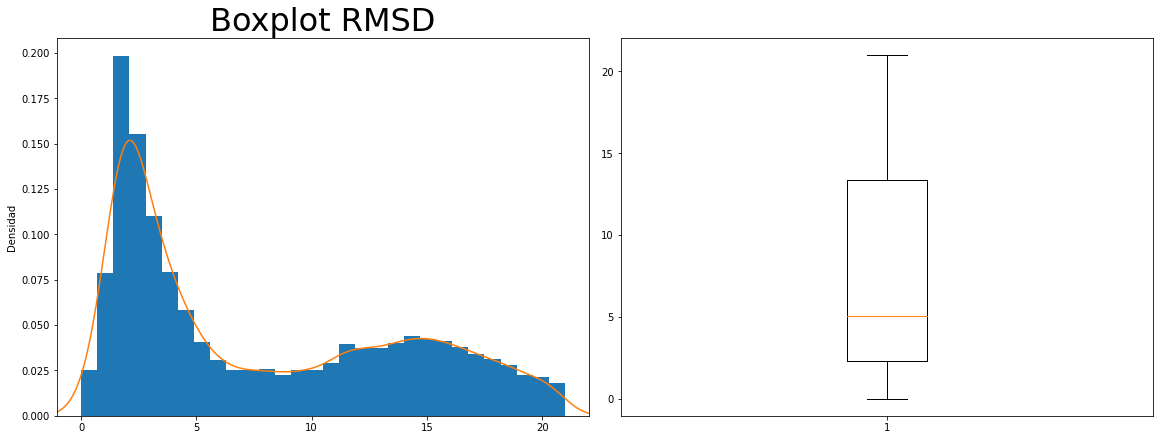

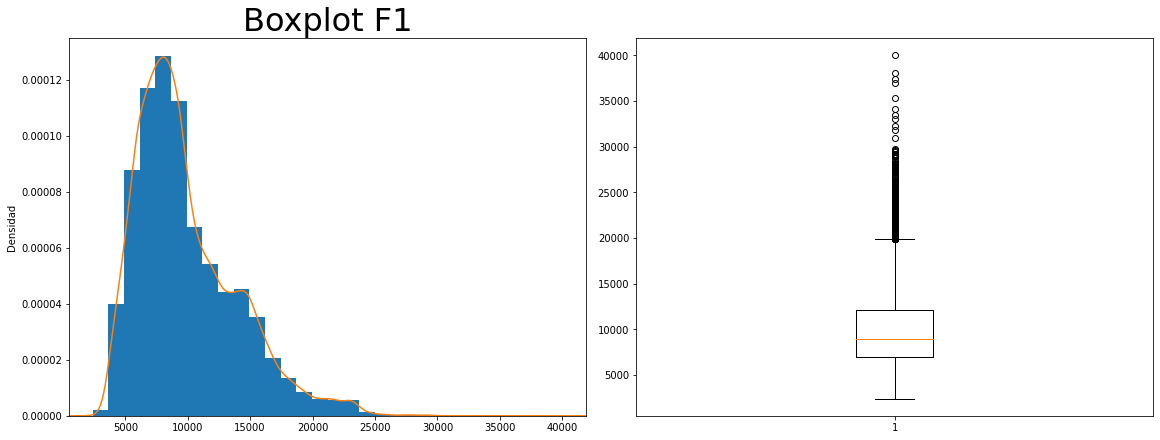

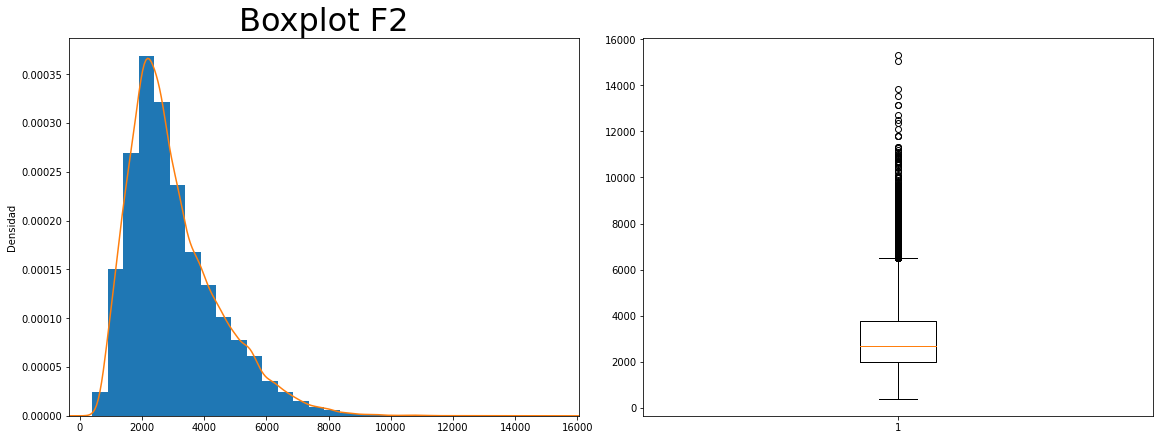

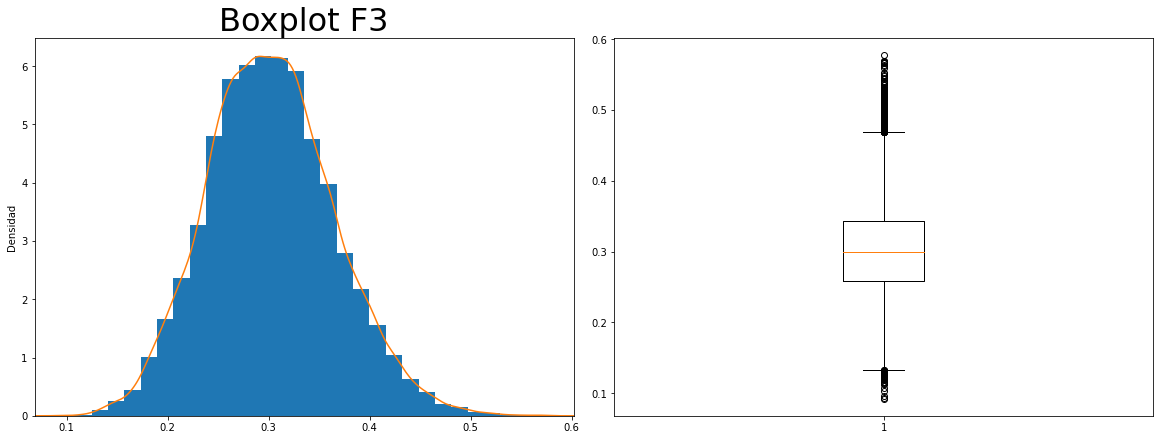

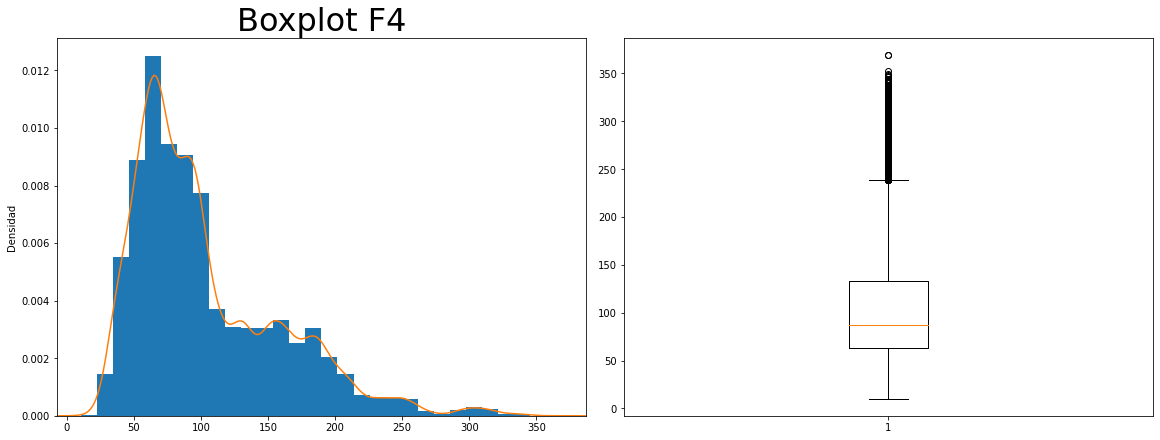

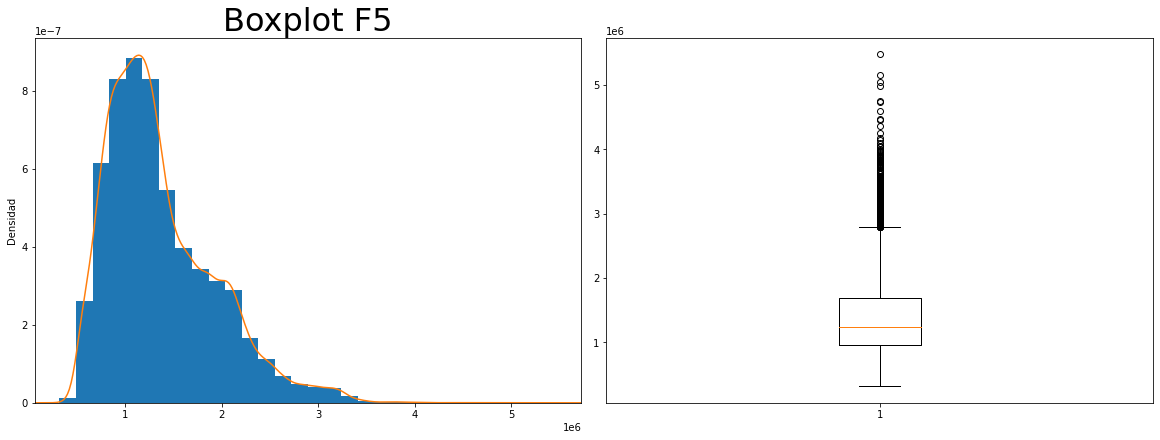

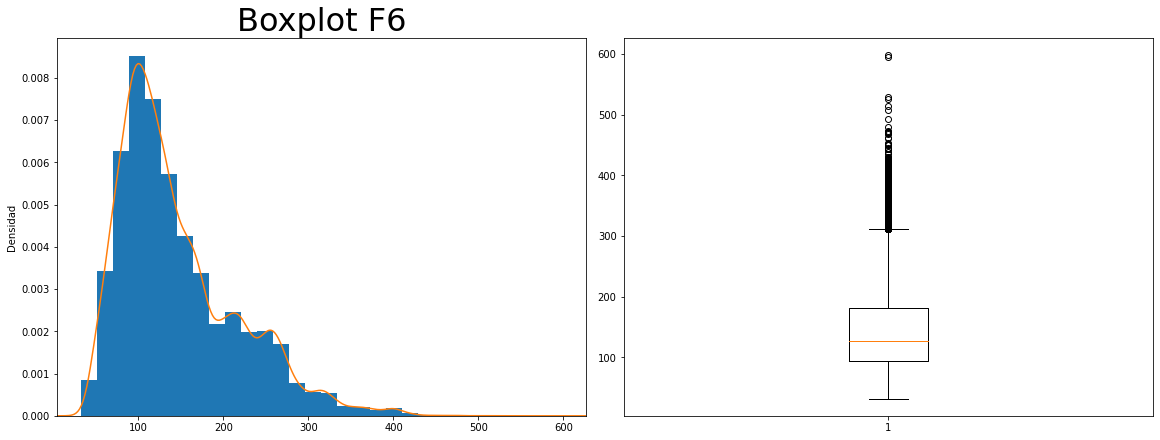

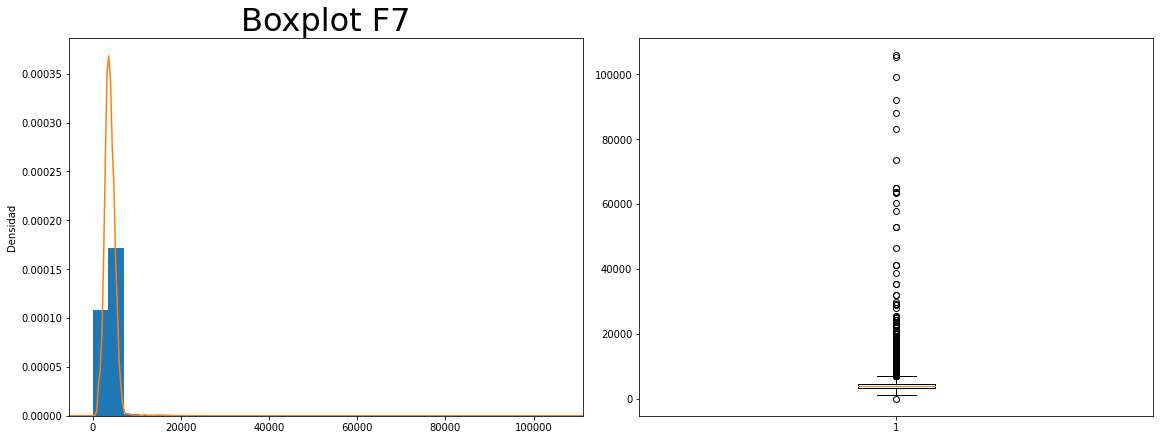

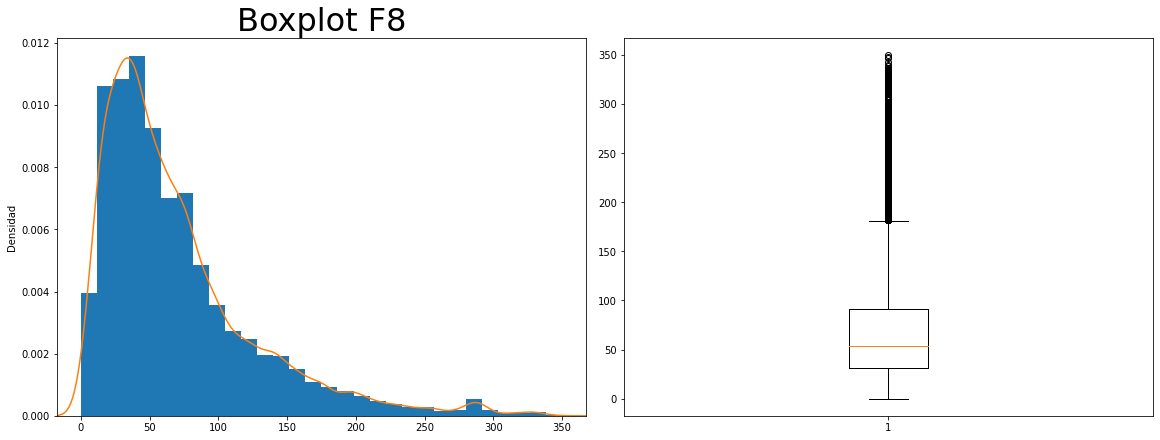

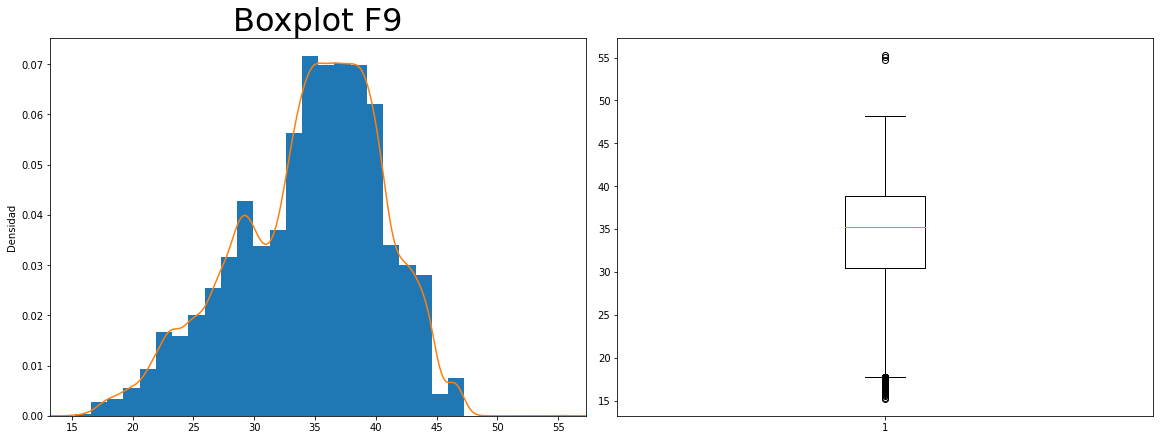

In [5]:
for c in df.keys():
    nn.pretty_param(df,c,30)

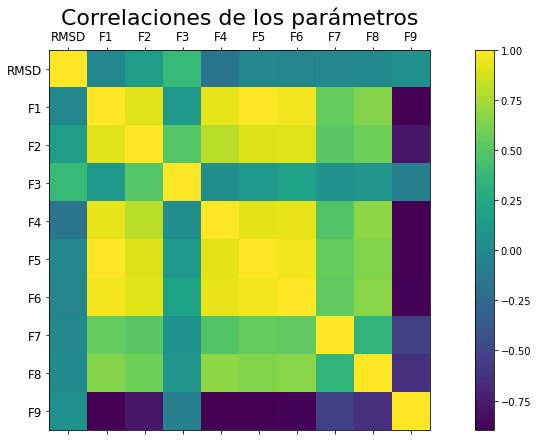

In [6]:
nn.pretty_corr_matrix(df,title="Correlaciones de los parámetros",figsize=(16,7))

### Modelos
 Para comparar la mejor forma de armar el modelo con el dataset, primero comparamos la diferencia entre el dataset original y normalizado, luego comparamos los resultados con features polinomiales.

In [7]:
features = [f"F{x}" for x in range(1,10)]
norm_df = (df[features]-df[features].mean())/df[features].std()
norm_df["RMSD"] = df["RMSD"]

In [8]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(df,test_size=0.3,poly_ord=1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 27.10
Coefficient of determination: 0.28


In [9]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.3,poly_ord=1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 27.10
Coefficient of determination: 0.28


Podemos ver como normalizar el dataset nos da un error menor en la estimación pero obtenemos el mismo coeficiente de determinación, implicando que el modelo tiene la misma capacidad de predicción.

In [10]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.3,poly_ord=1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 27.10
Coefficient of determination: 0.28


In [11]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.3,poly_ord=2)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 23.82
Coefficient of determination: 0.36


In [12]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.3,poly_ord=3)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 46.14
Coefficient of determination: -0.23


Al aumentar el orden a 2 se mejora el error y el coeficiente de determinación, pero con un feature polinomial de orden 3 las metricas empeoran, implicando que hay un overfitting en el modelo.

A continuación buscamos el test size optimo para obtener el minimo MSE de acuerdo a esta base de datos.

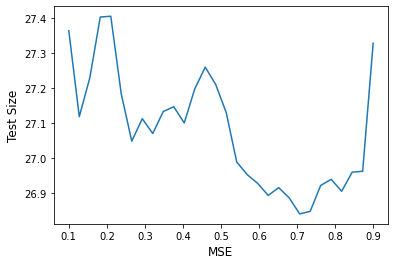

MSE minimo con test size 0.706896551724138


In [39]:
mse = []
arr = np.linspace(0.1,0.9,30)
for x in arr:
    x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=x,poly_ord=1)
    mse.append(mean_squared_error(y_test, y_pred))
plt.plot(arr,mse)
plt.xlabel("MSE",fontsize=12)
plt.ylabel("Test Size",fontsize=12)
plt.show()
print(f"MSE minimo con test size {arr[mse.index(min(mse))]}")

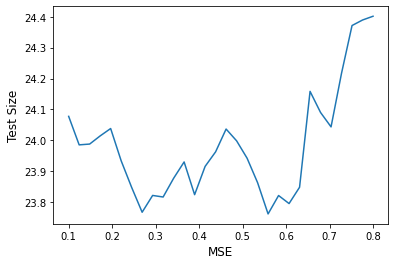

MSE minimo con test size 0.5586206896551725


In [40]:
mse = []
arr = np.linspace(0.1,0.8,30)
for x in arr:
    x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=x,poly_ord=2)
    mse.append(mean_squared_error(y_test, y_pred))
plt.plot(arr,mse)
plt.xlabel("MSE",fontsize=12)
plt.ylabel("Test Size",fontsize=12)
plt.show()
print(f"MSE minimo con test size {arr[mse.index(min(mse))]}")

### Curva de aprendizaje

In [41]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.7,poly_ord=1)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 26.84
Coefficient of determination: 0.28


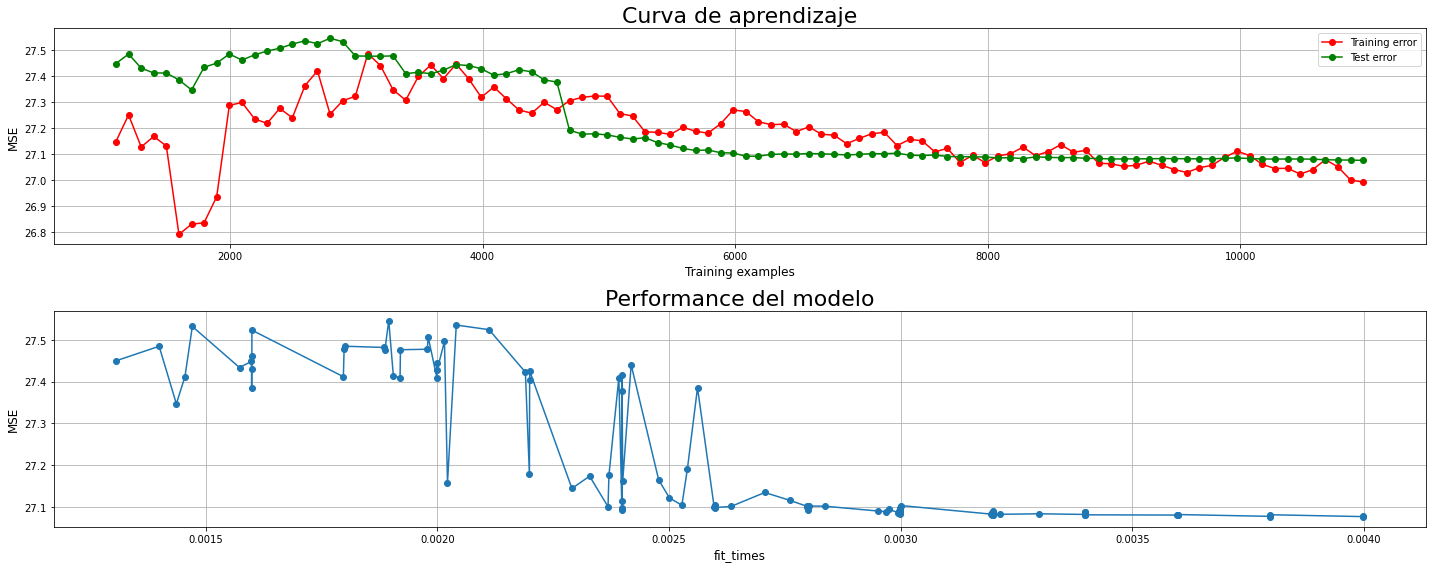

In [42]:
nn.plot_learning_curve(linear_model.LinearRegression(),"Curva de aprendizaje",x_train,y_train,train_sizes=np.linspace(0.1, 1.0, 100),scoring="neg_mean_squared_error",n_jobs=1)
plt.tight_layout()

In [43]:
x_train, y_train, x_test, y_test, y_pred = nn.test_linear_regression(norm_df,test_size=0.55,poly_ord=2)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean squared error: 23.81
Coefficient of determination: 0.37


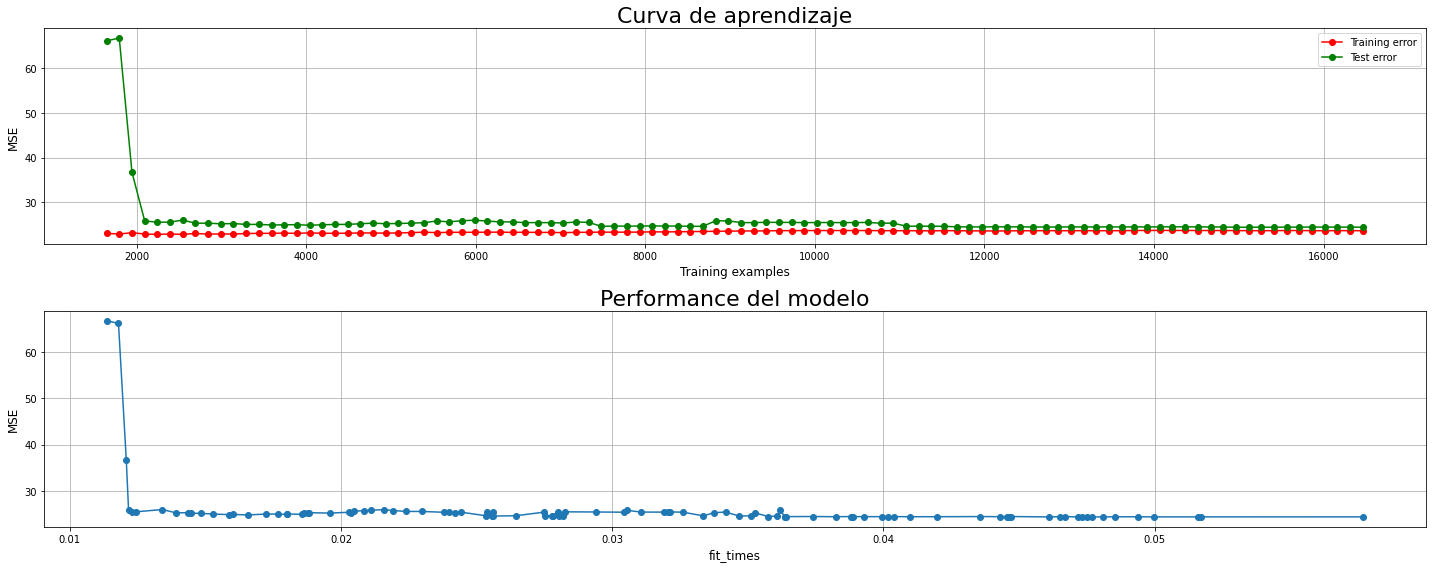

In [44]:
nn.plot_learning_curve(linear_model.LinearRegression(),"Curva de aprendizaje",x_train,y_train,train_sizes=np.linspace(0.1, 1.0, 100),scoring="neg_mean_squared_error",n_jobs=1)
plt.tight_layout()